In [37]:
import pandas as pd
import matplotlib.pyplot as plt

In [38]:
# Reading Train Data
train =pd.read_csv(r'D:\AI Bootcamp\Project2\NLP\train_data.csv', delimiter=',')

C:\Users\USER\AppData\Local\Temp\ipykernel_12908\1038676664.py:2: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  train =pd.read_csv(r'D:\AI Bootcamp\Project2\NLP\train_data.csv', delimiter=',')


In [39]:
train

,overall,vote,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime
0,2,NaN,False,2016-11-11,A2OSUEZJIN7BI,0511189877,NaN,Chris,I have an older URC-WR7 remote and thought thi...,Cannot Learn,1478822400
1,5,NaN,True,2016-06-06,A2NETQRG6JHIG7,0511189877,NaN,Qrysta White,First time I've EVER had a remote that needed ...,zero programming needed! Miracle!?,1465171200
2,4,NaN,True,2016-03-10,A12JHGROAX49G7,0511189877,NaN,Linwood,Got them and only 2 of them worked. company ca...,Works Good and programs easy.,1457568000
3,5,NaN,True,2016-01-14,A1KV65E2TMMG6F,0511189877,NaN,Dane Williams,I got tired of the remote being on the wrong s...,Same as TWC remote,1452729600
4,5,NaN,True,2016-10-20,A280POPEWI0NSA,0594459451,NaN,Kristina H.,After purchasing cheap cords from another webs...,Good Quality Cord,1476921600
...,...,...,...,...,...,...,...,...,...,...,...
838939,5,NaN,True,2017-07-25,A1OOVLE2KZ6KGA,B01HJCN1EI,NaN,Puddzee,These are my favorite charging cords for a few...,Worth the price.,1500940800
838940,1,NaN,True,2017-04-04,A77K1B31UAQ29,B01HJCN1EI,NaN,addictedtoreading,"Update....after 2 months of gentle use, cable ...",UPDATE...BREAKS AND SLOW CHARGING,1491264000
838941,3,NaN,True,2017-07-08,A2SVXUVUAWUDK2,B01HJH42KU,NaN,Andrew,These are okay. The connection becomes very if...,Hope this makes sense. You'd understand if you...,1499472000
838942,5,2.0,True,2016-12-01,A2HUZO7MQAY5I2,B01HJH40WU,NaN,michael clontz,"Ok here is an odd thing that happened to me, I...",Not the correct product as linked in the sale.,1480550400


In [40]:
train.describe()

,overall,unixReviewTime
count,838944.000000,8.389440e+05
mean,4.021317,1.483167e+09
std,1.344223,2.229270e+07
min,1.000000,1.451606e+09
25%,3.000000,1.464653e+09
50%,5.000000,1.479254e+09
75%,5.000000,1.499472e+09
max,5.000000,1.538525e+09


### <div dir="rtl" style="font-family: 'Segoe UI', Tahoma, sans-serif; font-size: 20px; color: #ffffff; font-weight: bold; padding: 10px; border-radius: 8px; background: linear-gradient(135deg, #2EA149, #60a5fa); text-align: right;"> 1.توزیع ستون overall</div>


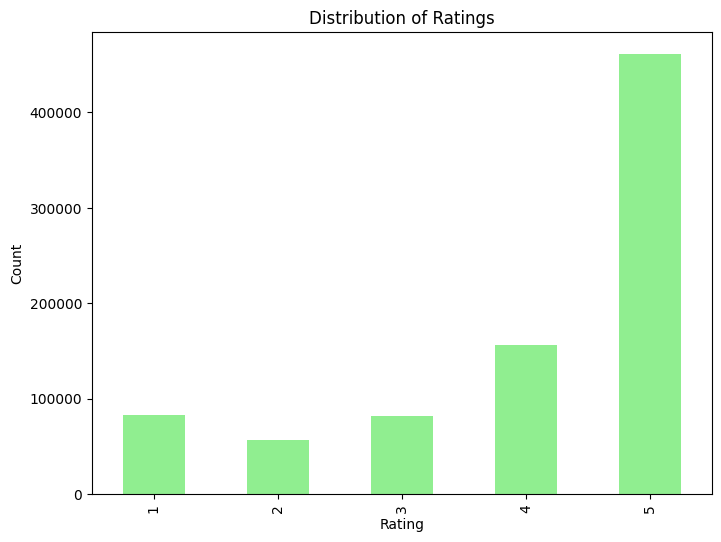

In [42]:
# plotting the distribution of 'overall' ratings
plt.figure(figsize=(8,6))
train['overall'].value_counts().sort_index().plot(kind='bar', color='lightgreen')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()


### <div dir="rtl" style="font-family: 'Segoe UI', Tahoma, sans-serif; font-size: 20px; color: #ffffff; font-weight: bold; padding: 10px; border-radius: 8px; background: linear-gradient(135deg, #2EA149, #60a5fa); text-align: right;"> از آنجا که توزیع متوازن نیست میتوانیم با استفاده از روش های مختلفی داده را آماده آموزش کنیم</div>


### <div dir="rtl" style="font-family: 'Segoe UI', Tahoma, sans-serif; font-size: 20px; color: #ffffff; font-weight: bold; padding: 10px; border-radius: 8px; background: linear-gradient(135deg, #2EA149, #60a5fa); text-align: right;"> 2. رسم ابر کلمات </div>


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


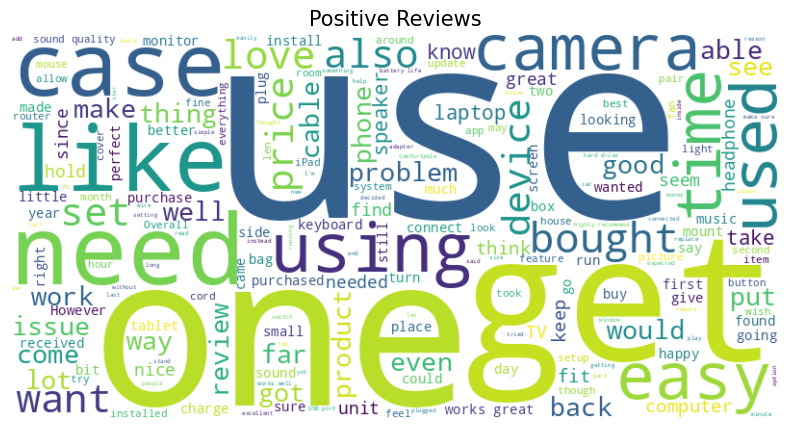

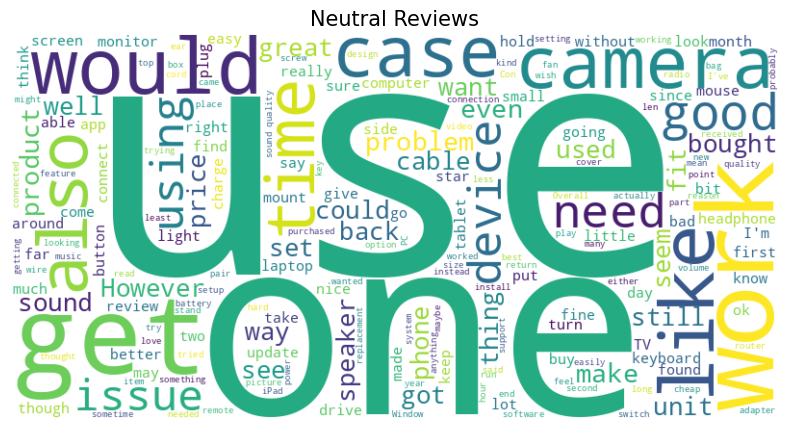

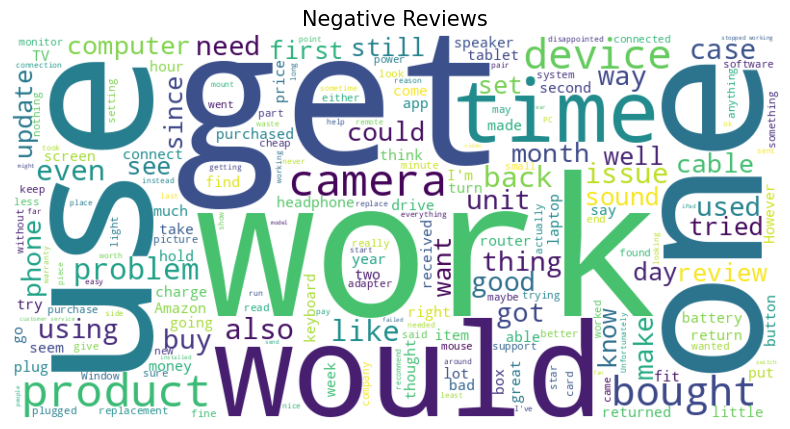

In [44]:
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords

# using nltk 
# data is in english so we define stop words accordingly
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))


# this def creates the visulization of word clouds
def create_word_cloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white' ,stopwords=stop_words).generate(text)
    wordcloud = WordCloud(
    width=800, 
    height=400, 
    stopwords=stop_words, 
    background_color='white',  
    ).generate(text)



    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title, fontsize=15)
    plt.axis('off')
    plt.show()

# defining positive reviews (rating 4,5)
positive_reviews = ' '.join(train[train['overall'].isin([4, 5])]['reviewText'].dropna())
# defining neutral reviews (rating 3)
neutral_reviews = ' '.join(train[train['overall'] == 3]['reviewText'].dropna())
# defining negative reviews (rating 1,2)
negative_reviews = ' '.join(train[train['overall'].isin([1, 2])]['reviewText'].dropna())

# creating word clouds
create_word_cloud(positive_reviews, 'Positive Reviews')
create_word_cloud(neutral_reviews, 'Neutral Reviews')
create_word_cloud(negative_reviews, 'Negative Reviews')


### <div dir="rtl" style="font-family: 'Segoe UI', Tahoma, sans-serif; font-size: 20px; color: #ffffff;  padding: 10px; border-radius: 8px; background: linear-gradient(135deg, #2EA149, #60a5fa); text-align: right;"><p> یک سری کلمات کاربرد عمومی دارند مثل use یا one .از  طرفی ظاهرا کلمه get در جملات مثبت استفاده کمتری دارد</p><p> کلماتی مثل love,like,easy,.. برخلاف نظرات منفی و خنثی، در نظرات مثبت فراوانی بالایی دارند. بدیهی است که کلمات با مفهوم مثبت در نظرات مثبت، و کلمات با مفهوم منفی در نظرات منفی رایج باشند
</div>


### <div dir="rtl" style="font-family: 'Segoe UI', Tahoma, sans-serif; font-size: 20px; color: #ffffff; font-weight: bold; padding: 10px; border-radius: 8px; background: linear-gradient(135deg, #2EA149, #60a5fa); text-align: right;"> 3.نمایش ۱۰ نفری که در مجموع نظرات‌شان بیشتر مفید واقع شده</div>


In [8]:
# converting vote column to numeric values
train['vote'] = train['vote'].str.replace(',', '')
train['vote'] = pd.to_numeric(train['vote'], errors='coerce')

In [9]:
# defining best reviewers based on the votes on thier comments
best_reviewers = train.groupby('reviewerID')['vote'].sum().reset_index()
top10_reviewers = best_reviewers.sort_values(by='vote', ascending=False).head(10)

print(top10_reviewers[['reviewerID', 'vote']])


            reviewerID    vote
97732   A25GROL6KJV3QG  4345.0
218123  A3KJ0DF3LTNJ6X  3096.0
48709   A1KPFZCS71QKW5  2978.0
290448   AMYCUX8EWEUVV  2605.0
268447    ADLVFFE4VBT8  2605.0
128674  A2IK776FY6MEMG  2177.0
38885   A1GHPJB2N0D0RL  2167.0
312277   AW7UMXXJKFSNS  1912.0
159458  A2VQ0V1TWXF3U7  1820.0
254026   A7HWU6R6UQIX6  1560.0
